In [1]:
# loading the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from fancyimpute import KNN
from sklearn import metrics
 
 

Using TensorFlow backend.


In [2]:
# reading data into dataframe
Orginal_data = pd.read_csv("C:/Users/Hp/Desktop/BLESSED 2/credit-card-data.csv")

In [3]:
h = Orginal_data.copy()

In [4]:
h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [5]:
h.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [6]:
h.shape

(8950, 18)

# Missing Value Analysis

There are 3 techniques to find Missing Values.
        1. Mean method
        2. Median method
        3. KNN method

In [116]:

missing_val = pd.DataFrame(h.isnull().sum())

In [117]:
missing_val

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [118]:
missing_val = missing_val.reset_index()
missing_val

,index,0
0,CUST_ID,0
1,BALANCE,0
2,BALANCE_FREQUENCY,0
3,PURCHASES,0
4,ONEOFF_PURCHASES,0
5,INSTALLMENTS_PURCHASES,0
6,CASH_ADVANCE,0
7,PURCHASES_FREQUENCY,0
8,ONEOFF_PURCHASES_FREQUENCY,0
9,PURCHASES_INSTALLMENTS_FREQUENCY,0


In [119]:
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
missing_val

,Variables,Missing_percentage
0,CUST_ID,0
1,BALANCE,0
2,BALANCE_FREQUENCY,0
3,PURCHASES,0
4,ONEOFF_PURCHASES,0
5,INSTALLMENTS_PURCHASES,0
6,CASH_ADVANCE,0
7,PURCHASES_FREQUENCY,0
8,ONEOFF_PURCHASES_FREQUENCY,0
9,PURCHASES_INSTALLMENTS_FREQUENCY,0


In [120]:
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(h))*100
missing_val

,Variables,Missing_percentage
0,CUST_ID,0.000000
1,BALANCE,0.000000
2,BALANCE_FREQUENCY,0.000000
3,PURCHASES,0.000000
4,ONEOFF_PURCHASES,0.000000
5,INSTALLMENTS_PURCHASES,0.000000
6,CASH_ADVANCE,0.000000
7,PURCHASES_FREQUENCY,0.000000
8,ONEOFF_PURCHASES_FREQUENCY,0.000000
9,PURCHASES_INSTALLMENTS_FREQUENCY,0.000000


In [121]:
h['BALANCE'].loc[121] # actual value = 1464.324632

1464.324632

In [122]:
k = h.copy()

In [123]:
k['BALANCE'].loc[121] = np.nan

In [124]:
# Impute with mean
k['BALANCE'].fillna(k['BALANCE'].mean()).loc[121] # mean value = 1564.4860188945165

1564.4860188945165

In [125]:
# Impute with median
k['BALANCE'].fillna(k['BALANCE'].median()).loc[121] # median value = 873.090183

873.090183

In [126]:
k.shape

(8950, 18)

In [127]:
columns = ['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE',]

In [128]:
k = pd.DataFrame(KNN(k = 19).fit_transform(k.drop('CUST_ID',axis=1)),columns=columns, index=k.index)

Imputing row 1/8950 with 0 missing, elapsed time: 13.411
Imputing row 101/8950 with 0 missing, elapsed time: 13.427
Imputing row 201/8950 with 0 missing, elapsed time: 13.427
Imputing row 301/8950 with 0 missing, elapsed time: 13.427
Imputing row 401/8950 with 0 missing, elapsed time: 13.427
Imputing row 501/8950 with 0 missing, elapsed time: 13.427
Imputing row 601/8950 with 0 missing, elapsed time: 13.427
Imputing row 701/8950 with 0 missing, elapsed time: 13.427
Imputing row 801/8950 with 0 missing, elapsed time: 13.427
Imputing row 901/8950 with 0 missing, elapsed time: 13.427
Imputing row 1001/8950 with 0 missing, elapsed time: 13.427
Imputing row 1101/8950 with 0 missing, elapsed time: 13.442
Imputing row 1201/8950 with 0 missing, elapsed time: 13.442
Imputing row 1301/8950 with 0 missing, elapsed time: 13.442
Imputing row 1401/8950 with 0 missing, elapsed time: 13.442
Imputing row 1501/8950 with 0 missing, elapsed time: 13.442
Imputing row 1601/8950 with 0 missing, elapsed time:

In [129]:
h['BALANCE'].loc[121]

1464.324632

Here we can use knn for finding missing values but knn works only on numerical variables but we have a variable with 
 datatype value factor , we can convert them into numeric but as we are doing clustering, we are not supposed to do that.so, we are going for median.

In [130]:
h.shape

(8950, 18)

In [7]:
h['CREDIT_LIMIT'].fillna(h['CREDIT_LIMIT'].median(),inplace=True)
h['MINIMUM_PAYMENTS'].fillna(h['MINIMUM_PAYMENTS'].median(),inplace=True)

In [8]:
 pd.DataFrame(h.isnull().sum())

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


There are no missing values.

# Feature Extraction (Deriving New KPI)

#### 1 . Monthly average purchase and Cash advancement amount

In [9]:
h['Monthly_avg_purchase']=h['PURCHASES']/h['TENURE']
h['Monthly_cash_advance']=h['CASH_ADVANCE']/h['TENURE']

In [134]:
h['Monthly_avg_purchase'].head()

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_avg_purchase, dtype: float64

In [135]:
h['Monthly_cash_advance'].head()

0      0.000000
1    536.912124
2      0.000000
3     17.149001
4      0.000000
Name: Monthly_cash_advance, dtype: float64

In [136]:
h[h['ONEOFF_PURCHASES']==0]['ONEOFF_PURCHASES'].count()

4302

#### 2. Purchase type

Here we are trying to extract different types of customers based on their purchases.We have two variables
 1. ONEOFF_PURCHASES 2 .INSTALLMENTS_PURCHASES
, using these variables we extract customer behaviour 

In [137]:
h.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']].head()

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.4
1,0.00,0.0
2,773.17,0.0
3,1499.00,0.0
4,16.00,0.0


In [10]:
h[(h['ONEOFF_PURCHASES']==0) & (h['INSTALLMENTS_PURCHASES']==0)].shape

(2042, 20)

In [139]:
h[(h['ONEOFF_PURCHASES']==0) & (h['INSTALLMENTS_PURCHASES']>0)].shape

(2260, 20)

In [140]:
h[(h['ONEOFF_PURCHASES']>0) & (h['INSTALLMENTS_PURCHASES']==0)].shape

(1874, 20)

In [141]:
h[(h['ONEOFF_PURCHASES']>0) & (h['INSTALLMENTS_PURCHASES']>0)].shape

(2774, 20)

#### We can observe, they are 4 types of customer behaviours.
     1). Customers who do only online/offline Purchases.
     2). Customers who purchases only through Installments.
     3). Customers who purchases both through online/offline and installments.
     4). Customers who don't do any type of purchases

#### 3 . Now we are extracting new variable called "Purchase_Type" which will be a categorical variable.

In [11]:
def purchase(h):   
    if (h['ONEOFF_PURCHASES']==0) & (h['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (h['ONEOFF_PURCHASES']>0) & (h['INSTALLMENTS_PURCHASES']>0):
         return 'both_online/offline_installment'
    if (h['ONEOFF_PURCHASES']>0) & (h['INSTALLMENTS_PURCHASES']==0):
        return 'online/offline_Purchases'
    if (h['ONEOFF_PURCHASES']==0) & (h['INSTALLMENTS_PURCHASES']>0):
        return 'installment'

In [12]:
h['Purchase_Type']=h.apply(purchase,axis=1)

In [144]:
h['Purchase_Type'].value_counts()

both_online/offline_installment    2774
installment                        2260
none                               2042
online/offline_Purchases           1874
Name: Purchase_Type, dtype: int64

#### 4. Limit_Usage
    Here we are extracting 'limit_usage' variable using BALANCE and CREDIT_LIMIT variables

In [13]:
h['limit_usage']=h.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'], axis=1)

In [146]:
j = h.copy()

In [147]:
h['limit_usage'].head()

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: limit_usage, dtype: float64

the lowest values are the values with good credit score

#### 4.Payment to minimum paymensts ratio
 Here we are extracting 'payment_minpay' from 'PAYMENTS'and 'MINIMUM_PAYMENTS' variables

In [14]:
h['payment_minpay']=h.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'],axis=1)


In [149]:
h['payment_minpay'].describe()

count    8950.000000
mean        9.059164
std       118.180526
min         0.000000
25%         0.913275
50%         2.032717
75%         6.052729
max      6840.528861
Name: payment_minpay, dtype: float64

In [150]:
h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 23 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

#### 5. Average amount per purchase and cash advance transaction

In [151]:
h.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE',
       'Monthly_avg_purchase', 'Monthly_cash_advance', 'Purchase_Type',
       'limit_usage', 'payment_minpay'],
      dtype='object')

In [152]:
h.Monthly_avg_purchase.head()

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_avg_purchase, dtype: float64

In [153]:
h.CASH_ADVANCE_TRX.head()

0    0
1    4
2    0
3    1
4    0
Name: CASH_ADVANCE_TRX, dtype: int64

#### As these variables are already present in the dataset,there is no need of feature extraction. 

# Outlier Analysis

In [154]:
h.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.138560
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.000000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.570000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.250000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.000000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.211760
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.500000


In [15]:
# log tranformation would be appropiate for outliers 
data=h.drop(['CUST_ID','Purchase_Type'],axis=1).applymap(lambda x: np.log(x+1))

In [156]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,6.161637,2.013303,0.000000,4.861995,6.773521,7.628099,9.854515
BALANCE_FREQUENCY,8950.0,0.619940,0.148590,0.000000,0.635989,0.693147,0.693147,0.693147
PURCHASES,8950.0,4.899647,2.916872,0.000000,3.704627,5.892417,7.013133,10.800403
ONEOFF_PURCHASES,8950.0,3.204274,3.246365,0.000000,0.000000,3.663562,6.360274,10.615512
INSTALLMENTS_PURCHASES,8950.0,3.352403,3.082973,0.000000,0.000000,4.499810,6.151961,10.021315
CASH_ADVANCE,8950.0,3.319086,3.566298,0.000000,0.000000,0.000000,7.016449,10.760839
PURCHASES_FREQUENCY,8950.0,0.361268,0.277317,0.000000,0.080042,0.405465,0.650588,0.693147
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.158699,0.216672,0.000000,0.000000,0.080042,0.262364,0.693147
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.270072,0.281852,0.000000,0.000000,0.154151,0.559616,0.693147
CASH_ADVANCE_FREQUENCY,8950.0,0.113512,0.156716,0.000000,0.000000,0.000000,0.200671,0.916291


In [157]:
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Monthly_avg_purchase', 'Monthly_cash_advance', 'limit_usage',
       'payment_minpay'],
      dtype='object')

In [16]:
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
data_pre=data[[x for x in data.columns if x not in col ]]

# Insights from new KPI

#### 1. Customers who have installment purchases are due payers

In [17]:
# Average payment_minpayment ratio for each purchse type.
x = h.groupby('Purchase_Type').apply(lambda x: np.mean(x['payment_minpay']))


Text(0.5, 1.0, 'Average_payment_minpayment ratio for each purchase type')

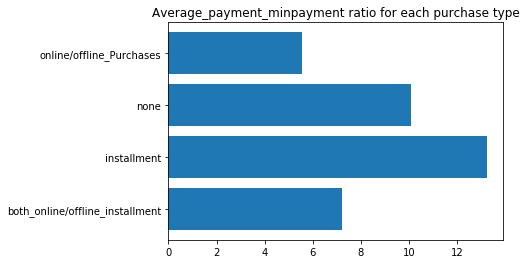

In [18]:
# histogram plots for Average payment_minpayment ratio
#plt.barh(left=np.arange(len(x)),bottom=x.values)
fig,ax=plt.subplots()
ax.barh(y=range(len(x)),width=x.values)
ax.set(yticks= np.arange(len(x)),yticklabels=x.index);
plt.title('Average_payment_minpayment ratio for each purchase type')


In [161]:
h.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.138560
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.000000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.570000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.250000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.000000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.211760
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.500000


In [162]:
h.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE',
       'Monthly_avg_purchase', 'Monthly_cash_advance', 'Purchase_Type',
       'limit_usage', 'payment_minpay'],
      dtype='object')

####  2.Customers who don't do either online/offline purchases or installment purchases take more cash on advance.

Text(0.5, 1.0, 'Average cash advance taken by customers of different Purchase type : Both online/offline & Installments, None,Installments,Online/Offline')

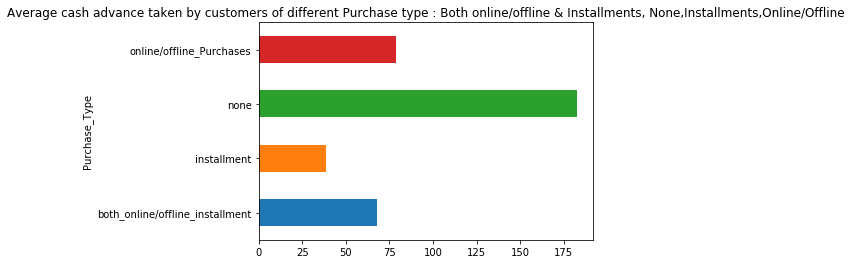

In [19]:
h.groupby('Purchase_Type').apply(lambda x: np.mean(x['Monthly_cash_advance'])).plot.barh()

plt.title('Average cash advance taken by customers of different Purchase type : Both online/offline & Installments, None,Installments,Online/Offline')

#### 3. Customers with installment purchases have a good credit score 

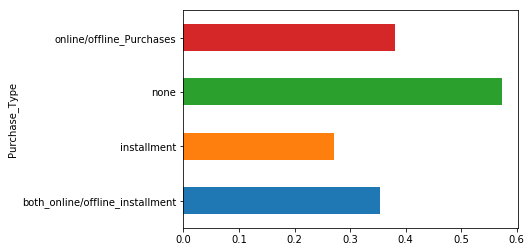

In [20]:
h.groupby('Purchase_Type').apply(lambda x: np.mean(x['limit_usage'])).plot.barh()

The type of customer with low limit-usage value has good credit score

In [165]:
h.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,Purchase_Type,limit_usage,payment_minpay
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,installment,0.040901,1.446508
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,none,0.457495,3.826241
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,online/offline_Purchases,0.332687,0.991682
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001,online/offline_Purchases,0.222223,0.000000
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,online/offline_Purchases,0.681429,2.771075


# Tunning Model  

In [166]:
data_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 13 columns):
BALANCE_FREQUENCY                   8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null float64
PURCHASES_TRX                       8950 non-null float64
Monthly_avg_purchase                8950 non-null float64
Monthly_cash_advance                8950 non-null float64
limit_usage                         8950 non-null float64
payment_minpay                      8950 non-null float64
dtypes: float64(13)
memory usage: 909.1 KB


In [167]:
h.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE',
       'Monthly_avg_purchase', 'Monthly_cash_advance', 'Purchase_Type',
       'limit_usage', 'payment_minpay'],
      dtype='object')

In [21]:
# Original dataset with categorical column converted to number type.
data_original=pd.concat([h,pd.get_dummies(h['Purchase_Type'])],axis=1)

In [22]:
# creating Dummies for categorical variable
data_pre['Purchase_Type']=h.loc[:,'Purchase_Type']


C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
pd.get_dummies(data_pre['Purchase_Type']).head()

,both_online/offline_installment,installment,none,online/offline_Purchases
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [24]:
data_dummy=pd.concat([data_pre,pd.get_dummies(data_pre['Purchase_Type'])],axis=1)

In [172]:
data_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
BALANCE_FREQUENCY                   8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null float64
PURCHASES_TRX                       8950 non-null float64
Monthly_avg_purchase                8950 non-null float64
Monthly_cash_advance                8950 non-null float64
limit_usage                         8950 non-null float64
payment_minpay                      8950 non-null float64
Purchase_Type                       8950 non-null object
both_online/offline_installment     8950 non-null uint8
installment               

In [25]:
data_dummy=data_dummy.drop(['Purchase_Type'],axis=1)

In [174]:
data_dummy.shape

(8950, 17)

In [26]:
data_dummy.isnull().sum()

BALANCE_FREQUENCY                   0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
Monthly_avg_purchase                0
Monthly_cash_advance                0
limit_usage                         0
payment_minpay                      0
both_online/offline_installment     0
installment                         0
none                                0
online/offline_Purchases            0
dtype: int64

In [176]:
data_dummy.describe()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay,both_online/offline_installment,installment,none,online/offline_Purchases
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.619940,3.204274,3.352403,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,3.050877,2.163970,0.296081,1.357600,0.309944,0.252514,0.228156,0.209385
std,0.148590,3.246365,3.082973,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,2.002823,2.429741,0.250303,0.940149,0.462496,0.434479,0.419667,0.406893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.635989,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,1.481458,0.000000,0.040656,0.648817,0.000000,0.000000,0.000000,0.000000
50%,0.693147,3.663562,4.499810,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,3.494587,0.000000,0.264455,1.109459,0.000000,0.000000,0.000000,0.000000
75%,0.693147,6.360274,6.151961,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,4.587295,4.606022,0.540911,1.953415,1.000000,1.000000,0.000000,0.000000
max,0.693147,10.615512,10.021315,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,8.315721,8.276166,2.827902,8.830767,1.000000,1.000000,1.000000,1.000000


# Feature Selection

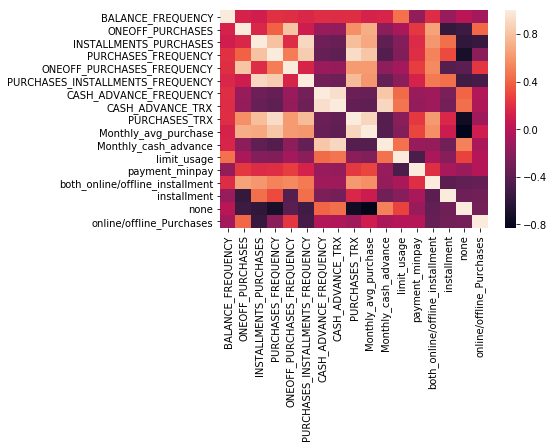

In [27]:
#finding corelation through heatmap
sns.heatmap(data_dummy.corr())

 Heat map shows that there is corelation between many features, so in order to remove multicollinearity ,we are using dimensionality reduction technique 


# Feature Scaling

here we are trying to bring different measurments into a common scale

In [28]:
from sklearn.preprocessing import  StandardScaler
sc=StandardScaler()
data_scaled=sc.fit_transform(data_dummy)

### PCA ( to eliminate multicollinearity)

Principal Component Analysis (PCA) is a statistical procedure that uses an orthogonal transformation which converts a set of correlated variables to a set of uncorrelated variables. PCA is a most widely used tool in exploratory data analysis and in machine learning for predictive models. Moreover, PCA is an unsupervised statistical technique used to examine the interrelations among a set of variables. It is also known as a general factor analysis where regression determines a line of best fit.

In [179]:
from sklearn.decomposition import PCA

In [180]:
var_ratio={}
for n in range(4,15):
    pc=PCA(n_components=n)
    data_pca=pc.fit(data_scaled)
    var_ratio[n]=sum(data_pca.explained_variance_ratio_)

In [181]:
pc=PCA(n_components=5)

In [182]:
p=pc.fit(data_scaled)

In [183]:
data_scaled.shape

(8950, 17)

In [184]:
p.explained_variance_

array([6.83574755, 3.07030693, 2.50427698, 1.38746289, 1.1138166 ])

In [185]:
var_ratio

{4: 0.8115442762351257,
 5: 0.8770555795291428,
 6: 0.9186492443512619,
 7: 0.9410925256030133,
 8: 0.9616114053683066,
 9: 0.9739787081990648,
 10: 0.9835896584630704,
 11: 0.9897248107341957,
 12: 0.9927550009135226,
 13: 0.9953907562385421,
 14: 0.9979616898169594}

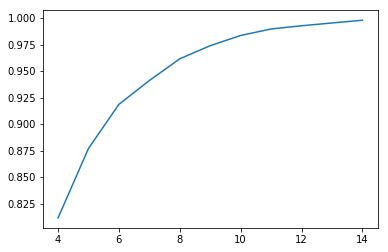

In [186]:
pd.Series(var_ratio).plot()

we are selecting 5 components , as they are generating more variance

In [187]:
pc_final=PCA(n_components=5).fit(data_scaled)

reduced_cr=pc_final.fit_transform(data_scaled)

In [188]:
cd=pd.DataFrame(reduced_cr)

In [189]:
cd.shape

(8950, 5)

In [190]:
columns_list=data_dummy.columns

In [191]:
columns_list

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'limit_usage', 'payment_minpay',
       'both_online/offline_installment', 'installment', 'none',
       'online/offline_Purchases'],
      dtype='object')

In [192]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(5)],index=columns_list)

,PC_0,PC_1,PC_2,PC_3,PC_4
BALANCE_FREQUENCY,0.029707,0.240072,-0.263140,-0.353549,-0.228681
ONEOFF_PURCHASES,0.214107,0.406078,0.239165,0.001520,-0.023197
INSTALLMENTS_PURCHASES,0.312051,-0.098404,-0.315625,0.087983,-0.002181
PURCHASES_FREQUENCY,0.345823,0.015813,-0.162843,-0.074617,0.115948
ONEOFF_PURCHASES_FREQUENCY,0.214702,0.362208,0.163222,0.036303,-0.051279
PURCHASES_INSTALLMENTS_FREQUENCY,0.295451,-0.112002,-0.330029,0.023502,0.025871
CASH_ADVANCE_FREQUENCY,-0.214336,0.286074,-0.278586,0.096353,0.360132
CASH_ADVANCE_TRX,-0.229393,0.291556,-0.285089,0.103484,0.332753
PURCHASES_TRX,0.355503,0.106625,-0.102743,-0.054296,0.104971
Monthly_avg_purchase,0.345992,0.141635,0.023986,-0.079373,0.194147


In [193]:
 
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(5)])

PC_0    0.402058
PC_1    0.180586
PC_2    0.147294
PC_3    0.081606
PC_4    0.065511
dtype: float64

# K-means Clustering

In [194]:
from sklearn.cluster import KMeans

In [195]:
distortions=[]
K=range(1,10)
for k in K:
    kmean_model=KMeans(n_clusters=k)
    kmean_model.fit(reduced_cr)
    distortions.append(kmean_model.inertia_)

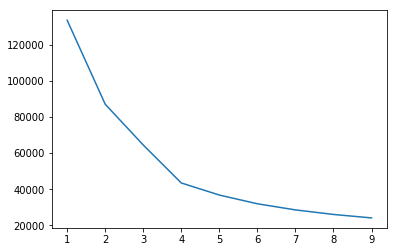

In [196]:
plt.plot(K,distortions)

# 5 clusters

In [197]:
km_5=KMeans(n_clusters=5,random_state=112)
km_5.fit(reduced_cr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=112, tol=0.0001, verbose=0)

In [198]:
km_5.labels_

array([3, 0, 2, ..., 3, 0, 2])

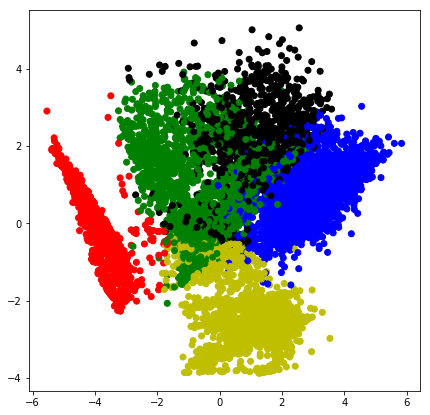

In [199]:

color_map={0:'r',1:'b',2:'g',3:'y',4:'k'}
label_color=[color_map[l] for l in km_5.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=label_color)

# Checking performance metrics for 5 clusters

In [200]:

from sklearn.metrics import calinski_harabaz_score,silhouette_score

Calinski Harabaz score

There is no "acceptable" cut-off value. You simply compare CH values by eye. The higher the value, the "better" is the solution. If on the line-plot of CH values there appears that one solution give a peak or at least an abrupt elbow, choose it. If, on the contrary, the line is smooth - horizontal or ascending or descending - then there is no reason to prefer one solution to others.


Silhouette Score


Silhouette values lies in the range of [-1, 1]. A value of +1 indicates that the sample is far away from its neighboring cluster and very close to the cluster its assigned. Similarly, value of -1 indicates that the point is close to its neighboring cluster than to the cluster its assigned. And, a value of 0 means its at the boundary of the distance between the two cluster. Value of +1 is idea and -1 is least preferred. Hence, higher the value better is the cluster configuration.










In [201]:

calinski_harabaz_score(reduced_cr,km_5.labels_)

5867.020860915632

In [202]:

silhouette_score(reduced_cr,km_5.labels_)

0.4557517692881165

# 4 clusters

In [203]:
km_4=KMeans(n_clusters=4,random_state=112)
km_4.fit(reduced_cr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=112, tol=0.0001, verbose=0)

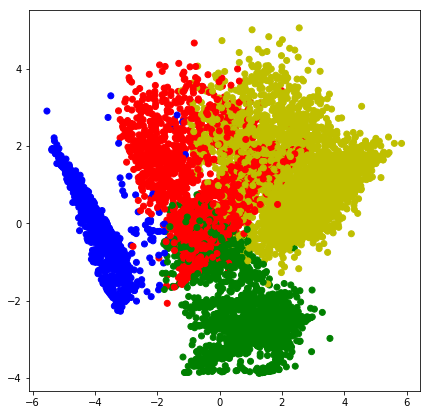

In [204]:

color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[l] for l in km_4.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=label_color)

# Checking performance metrics for 4 clusters

#### calinski_harabaz_score

In [205]:

calinski_harabaz_score(reduced_cr,km_4.labels_)

6164.054484808305

#### silhouette_score

In [206]:

silhouette_score(reduced_cr,km_4.labels_)

0.45925855176006003

# 6 clusters

In [207]:
km_6=KMeans(n_clusters=6,random_state=112)
km_6.fit(reduced_cr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=112, tol=0.0001, verbose=0)

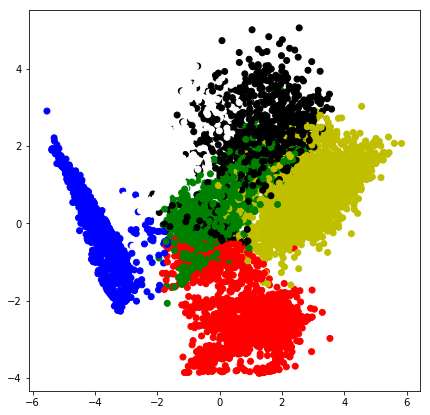

In [208]:
color_map={0:'r',1:'b',2:'g',3:'y',4:'w',5:'k'}
label_color=[color_map[l] for l in km_6.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=label_color)

# Checking performance metrics for 6 clusters

#### calinski_harabaz_score

In [209]:

calinski_harabaz_score(reduced_cr,km_6.labels_)

5669.505574153349

#### silhouette_score

In [210]:
silhouette_score(reduced_cr,km_6.labels_)

0.45041255340732084

#### From the performance metrice, we can observe that, for 4 clusters, the Calinski Harabaz score and Silhouette score is high, while compared to other two clusters assumptions. So, we choose taking 4 clusters. Now, in order to suggest the marketing strategy , we need to gain insight on 4 clusters.

In [211]:
df_plot=pd.DataFrame(reduced_cr,columns=['PC_' +str(i) for i in range(5)])

In [212]:
df_plot['Cluster']=km_4.labels_

In [217]:
data_original.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE',
       'Monthly_avg_purchase', 'Monthly_cash_advance', 'Purchase_Type',
       'limit_usage', 'payment_minpay', 'both_online/offline_installment',
       'installment', 'none', 'online/offline_Purchases'],
      dtype='object')

In [218]:
# Key performace variable selection . here i am dropping varibales which are used in derving new KPI
kpi_col=['PURCHASES_TRX','Monthly_avg_purchase','Monthly_cash_advance','limit_usage','CASH_ADVANCE_TRX',
         'payment_minpay','both_online/offline_installment','installment','online/offline_Purchases','none','CREDIT_LIMIT']

In [214]:
data_pre.describe()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.619940,3.204274,3.352403,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,3.050877,2.163970,0.296081,1.357600
std,0.148590,3.246365,3.082973,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,2.002823,2.429741,0.250303,0.940149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.635989,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,1.481458,0.000000,0.040656,0.648817
50%,0.693147,3.663562,4.499810,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,3.494587,0.000000,0.264455,1.109459
75%,0.693147,6.360274,6.151961,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,4.587295,4.606022,0.540911,1.953415
max,0.693147,10.615512,10.021315,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,8.315721,8.276166,2.827902,8.830767


In [221]:
# Conactenating labels found through Kmeans with data 
cluster_4=pd.concat([data_original[kpi_col],pd.Series(km_4.labels_,name='Cluster_4')],axis=1)


In [222]:
cluster_4.head()


,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,CASH_ADVANCE_TRX,payment_minpay,both_online/offline_installment,installment,online/offline_Purchases,none,CREDIT_LIMIT,Cluster_4
0,2,7.950000,0.000000,0.040901,0,1.446508,0,1,0,0,1000.0,2
1,0,0.000000,536.912124,0.457495,4,3.826241,0,0,0,1,7000.0,1
2,12,64.430833,0.000000,0.332687,0,0.991682,0,0,1,0,7500.0,0
3,1,124.916667,17.149001,0.222223,1,0.000000,0,0,1,0,7500.0,0
4,1,1.333333,0.000000,0.681429,0,2.771075,0,0,1,0,1200.0,0


In [223]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
cluster_df_4=cluster_4.groupby('Cluster_4')\
.apply(lambda x: x[kpi_col].mean()).T
cluster_df_4


Cluster_4,0,1,2,3
PURCHASES_TRX,7.118997,0.045933,12.053860,33.125453
Monthly_avg_purchase,69.758276,0.159337,47.573598,193.696083
Monthly_cash_advance,77.843485,186.298043,33.489846,67.620006
limit_usage,0.378727,0.576217,0.264275,0.354487
CASH_ADVANCE_TRX,2.864995,6.552632,1.019300,2.807107
payment_minpay,5.561421,9.927979,13.402660,7.268605
both_online/offline_installment,0.003735,0.002392,0.001795,1.000000
installment,0.000000,0.017225,0.998205,0.000000
online/offline_Purchases,0.996265,0.003349,0.000000,0.000000
none,0.000000,0.977033,0.000000,0.000000


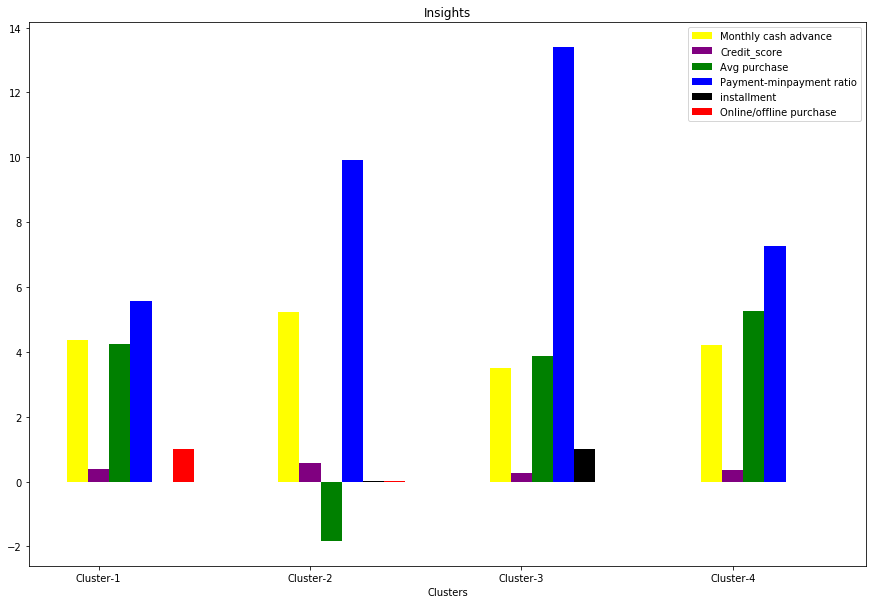

In [233]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_df_4.columns))

cash_advance=np.log(cluster_df_4.loc['Monthly_cash_advance',:].values)
credit_score=(cluster_df_4.loc['limit_usage',:].values)
purchase= np.log(cluster_df_4.loc['Monthly_avg_purchase',:].values)
payment=cluster_df_4.loc['payment_minpay',:].values
installment=cluster_df_4.loc['installment',:].values
one_off=cluster_df_4.loc['online/offline_Purchases',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='yellow',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='purple',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='green',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='blue',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='black',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='red',label='Online/offline purchase',width=bar_width)

plt.xlabel("Clusters")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cluster-1', 'Cluster-2', 'Cluster-3', 'Cluster-4'))
plt.legend()

### Conclusion form the theory of 4 clusters:
#### 1. The cluster-1 has highest 'online/offline purchases',least 'Payment-ratio', while compared to other clusters

#### 2. The cluster-2 has highest 'Monthly cash advance' and least 'Average purchases'. It also has 'online/offline' and 'installment' purchases.It also maintained good credit score, compared to other clusters.

#### 3. The cluster-3 has highest 'Payment ratio' and 'installment' purchases, compared to other clusters.It also has good 'Average Purchase'.But it doesnot have any 'installment' and 'online/offline' purchases.It also have least credit-score and Monthly cash advance.

#### 4. The cluster-4 has highest 'Average Purchase'. It has good 'Monthly cash advance'.It also doesnot have any online/offline and intsallment purchases.
    
        
    
    

# Suggestions on Marketing 


    


1. Category 1 : This group have maximum online/offline purchases but has least payment-ratio.So, we can conclude that they are                 not purchasing much throuh online/offline , may be there purchases are loan cuttings, bill payments, etc.
    


2. Category 2 : This group takes much cash in advance and do not spend more money,though they make some online/offline and                     installmentpurchases. We also need to remember that these are the group that maintained, good credit score,                     which is more important.We can increase their interest for purchasing , by giving reward points,offers on every                 transactions.



3. Category 3: This group has least monthly cash adavance, so we need to lower the interest rate, and give cash backs on their                every purchase.



4. Category 4: This group are main useful to gain profit as they take cash in advance, make pruchases and also does                            online/offline and installment purchases. We can give them loyalty cards.